# Code

### Imports

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from task1_utils import generateDataVectors,forward_pass,loss,getConfused,getErrorRate

### Data loading

In [6]:
features = ["SepalLength",
            "SepalWidth",
            "PetalLength",
            "PetalWidth",
            "Class"]

irisData = pd.read_csv("data/IrisData/iris.data", 
                   names=features)

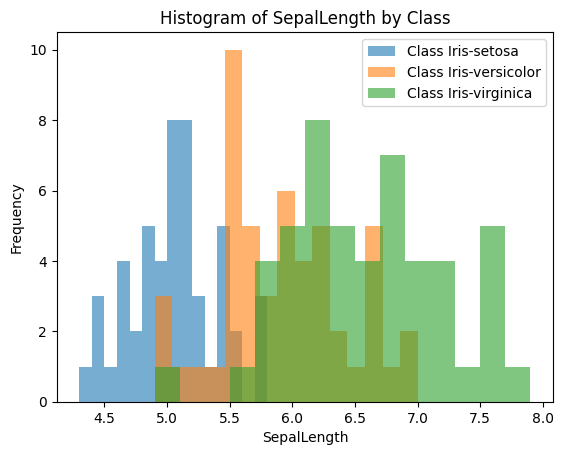

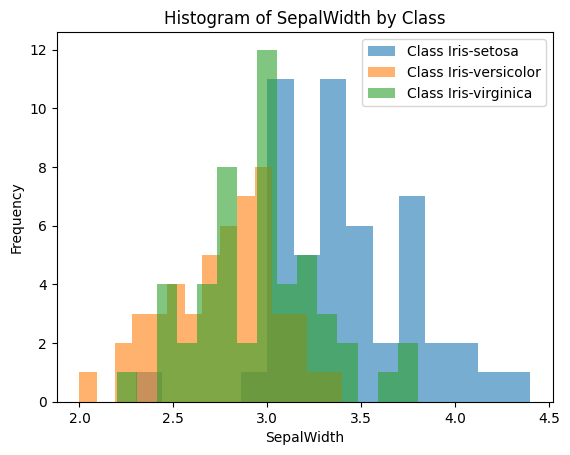

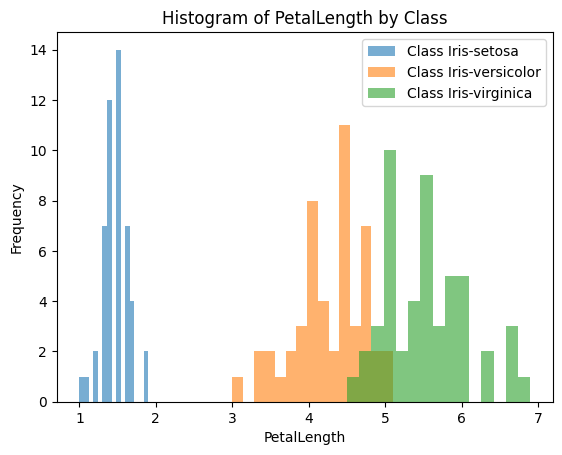

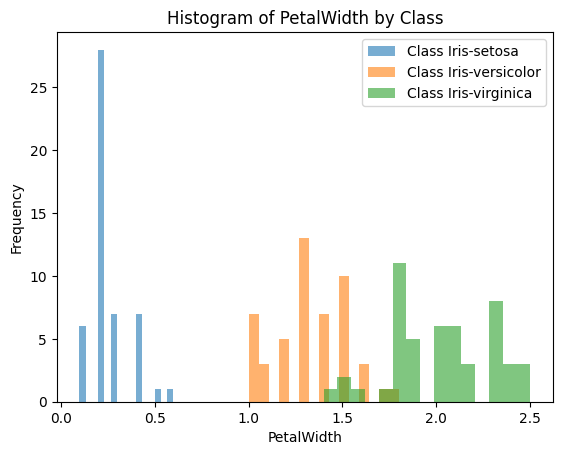

In [7]:
# Plot histogram by class
classes = irisData['Class'].unique()
for f_idx in range(4):
    plt.figure()
    for c in classes:
        subset = irisData[irisData['Class'] == c]
        plt.hist(subset[features[f_idx]], bins=15, alpha=0.6, label=f'Class {c}')

    plt.xlabel(f'{features[f_idx]}')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {features[f_idx]} by Class')
    plt.legend()
    plt.show()

In [8]:
# Take 30 first samples of each Class for training
train_data = irisData.groupby("Class").head(30)
test_data = irisData.drop(train_data.index)
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

# Drop features for training
drop_features = ["SepalWidth", "SepalLength", "PetalLength"]
train_data = train_data.drop(drop_features, axis=1)
test_data = test_data.drop(drop_features, axis=1)

# Generate data vectors
x_train, t_train = generateDataVectors(train_data)
x_test, t_test = generateDataVectors(test_data)

print(x_train.shape, t_train.shape, x_test.shape, t_test.shape)

(2, 90) (3, 90) (2, 60) (3, 60)


### Training

In [9]:
# initialize the weights
np.random.seed(42)

n_features = x_train.shape[0]
n_classes = t_train.shape[0]

W = np.random.randn(n_classes,n_features)

In [10]:
alpha = 0.001
iterations = 10**6

for i in range(iterations):
    g = forward_pass(x_train, W)

    MSE = loss(g,t_train)

    # Backward pass
    grad_MSE = ((g-t_train)*g*(1-g))@x_train.transpose()

    W -= alpha*grad_MSE

print(MSE)

11.310712332215243


### Prediction

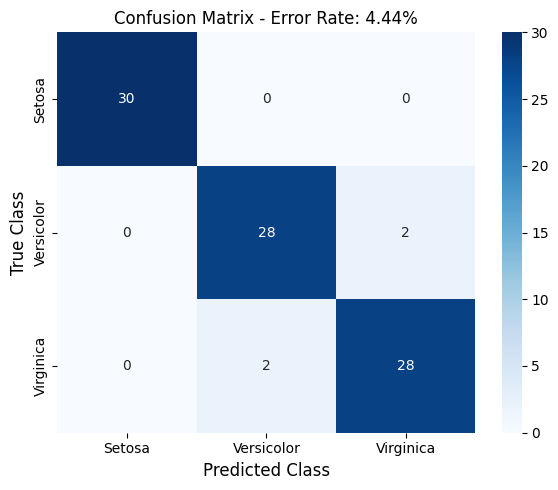

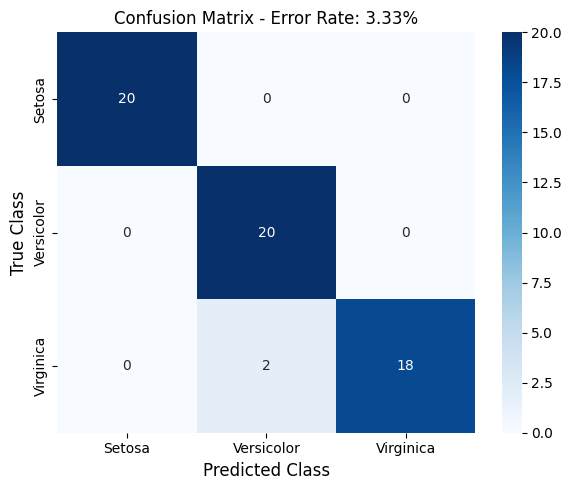

[[30  0  0]
 [ 0 28  2]
 [ 0  2 28]]
0.0444
[[20  0  0]
 [ 0 20  0]
 [ 0  2 18]]
0.0333


In [11]:
predictions_train = forward_pass(x_train,W)
predictions_test = forward_pass(x_test,W)

train_conf_matrix = getConfused(predictions_train, t_train)
test_conf_matrix = getConfused(predictions_test, t_test)

print(train_conf_matrix)
print(f"{getErrorRate(train_conf_matrix):.4f}")
print(test_conf_matrix)
print(f"{getErrorRate(test_conf_matrix):.4f}")

# Results

## 3 features - SepalWith removed:

MSE = 9.594

### Validation with training data:
[30.  0.  0.]\
[ 0. 29.  1.]\
[ 0.  0. 30.]

Error rate = 0.0110
### Validation with test data:
[20.  0.  0.]\
[ 0. 18.  2.]\
[ 0.  1. 19.]

Error rate = 0.0500

## 2 features - Petal remaining - Sepal removed

MSE = 10.366

### Validation with training data:
[30.  0.  0.]\
[ 0. 28.  2.]\
[ 0.  1. 29.]

Error rate = 0.0333
### Validation with test data:
[20.  0.  0.]\
[ 0. 20.  0.]\
[ 0.  2. 18.]

Error rate = 0.0333

## 1 feature - Petalwidth:

MSE = 11.311

### Validation with training data:
[30.  0.  0.]\
[ 0. 28.  2.]\
[ 0.  2. 28.]

Error rate = 0.0444
### Validation with test data:
[20.  0.  0.]\
[ 0. 20.  0.]\
[ 0.  2. 18.]

Error rate = 0.0333

## 1 feature - PetalLength:

MSE = 11.585

### Validation with training data:
[30.  0.  0.]\
[ 0. 27.  3.]\
[ 0.  2. 28.]

Error rate = 0.0588

### Validation with test data:
[20.  0.  0.]\
[ 0. 19.  1.]\
[ 0.  1. 19.]

Error rate = 0.0345


